In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import time

# ours
from solver.funcs import randomData, accuracy, plot2D, normalization
from solver.NSSVM import NSSVM
import psutil
import os 

In [3]:
# Load data from .mat files
data = loadmat('/Users/anabelyong/nssvm-python/NSSVM/solver/realdata/dhrb/dhrb.mat', matlab_compatible=True)
class_data = loadmat('/Users/anabelyong/nssvm-python/NSSVM/solver/realdata/dhrb/dhrbclass.mat', matlab_compatible=True)
X = data['X']  # Replace 'X' with the correct variable name if different
y = class_data['y'].ravel()  # Replace 'y' with the correct variable name if different
y[y != 1] = -1

# Normalize the data if necessary
X = normalization(X, 2 * (np.max(X) > 1)) 

# Randomly split the data into training and testing data
m = int(np.ceil(0.9 * X.shape[0]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=m, random_state=42)
M, n = X_train.shape

# svm
pars = {'C': 0.25, 
        's0': int(np.ceil(n * (np.log(m/n)) ** 2))}

Normalization used 0.0161 seconds.


In [4]:
# Get the memory usage before training the model
process = psutil.Process(os.getpid())
memory_before = process.memory_info().rss / (1024 * 1024)  # Memory in MiB
# training
model = NSSVM()
out = model.fit(X_train, y_train, pars)
# Get the memory usage after training the model
memory_after = process.memory_info().rss / (1024 * 1024)  # Memory in MiB
memory_used = memory_after - memory_before

    1          1.09e-02         0.82536
    2          1.33e-02         0.82502
    3          6.20e-04         0.17464
    4          6.66e-06         0.17464
    5          2.25e-30         0.17464


In [5]:
# evaluation
acc, _ = accuracy(X_train, out['w'], y_train)
tacc, _ = accuracy(X_test, out['w'], y_test)

In [6]:
# logging
if hasattr(model, 'alpha'):
    print(f"Support Vector Solutions, alpha^*: {model.alpha}")

# If 'alpha' is part of the 'out' dictionary
if 'alpha' in out:
    print(f"Support Vector Solutions, alpha^*: {out['alpha']}")
print(f"Training  Time:             {out['time']:.3f}sec")
print(f"Training  Size:             {m}x{n}")
print(f"Memory Used:                {-100*memory_used:.6f} MiB")
print(f"Training  Accuracy:         {acc*100:.2f}%")
print(f"Testing   Size:             {X_test.shape[0]}x{n}")
print(f"Testing   Accuracy:         {tacc*100:.2f}%")
print(f"Number of Support Vectors:  {out['sv']}")

Support Vector Solutions, alpha^*: [0.46719251 0.47138682 0.47058213 ... 0.         0.         0.        ]
Training  Time:             0.614sec
Training  Size:             53602x17
Memory Used:                1759.375000 MiB
Training  Accuracy:         82.50%
Testing   Size:             53602x17
Testing   Accuracy:         82.74%
Number of Support Vectors:  1104


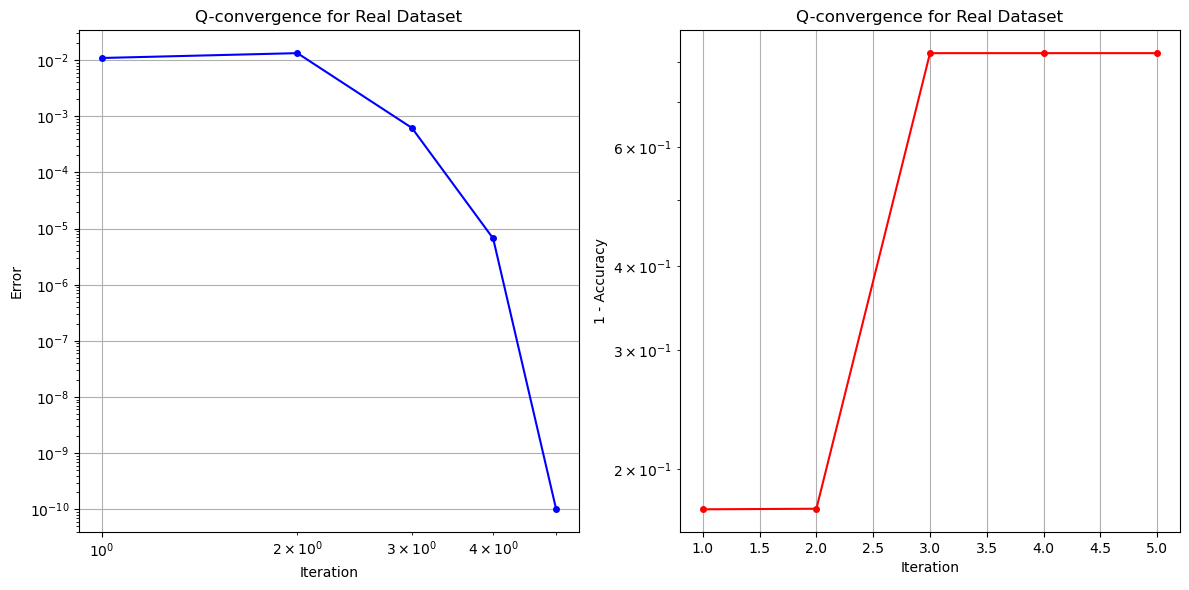

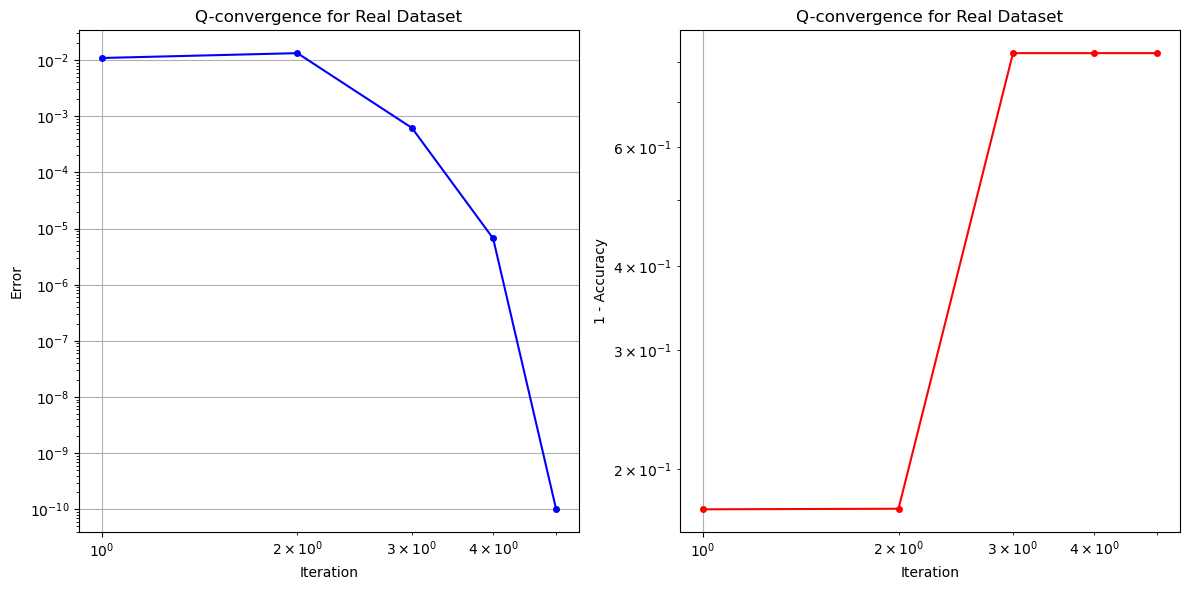

In [7]:
errors = [
    1.09e-02, 1.33e-02, 6.20e-04, 6.66e-06, 2.25e-30
]

accuracies = [
    0.82536, 0.82502, 0.17464, 0.17464, 0.17464, 
]

# Convert to numpy arrays for ease of plotting
iterations = np.arange(1, len(errors) + 1)
errors = np.array(errors)
accuracies = np.array(accuracies)

# Ensure no zero values for log scale
errors = np.maximum(errors, 1e-10)
accuracies = np.maximum(accuracies, 1e-10)

# Create subplots for the semi-log and log-log plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Semi-log plot for error
axs[0].loglog(iterations, errors, 'b-', marker='o', markersize=4)
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error')
axs[0].set_title('Q-convergence for Real Dataset')
axs[0].grid(True)

# Semi-log plot for accuracy
axs[1].semilogy(iterations, 1 - accuracies, 'r-', marker='o', markersize=4)  # Plot 1 - accuracy to represent error
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('1 - Accuracy')
axs[1].set_title('Q-convergence for Real Dataset')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Log-log plot for error
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Log-log plot for error
axs[0].loglog(iterations, errors, 'b-', marker='o', markersize=4)
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error')
axs[0].set_title('Q-convergence for Real Dataset')
axs[0].grid(True)

# Log-log plot for accuracy
axs[1].loglog(iterations, 1 - accuracies, 'r-', marker='o', markersize=4)  # Plot 1 - accuracy to represent error
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('1 - Accuracy')
axs[1].set_title('Q-convergence for Real Dataset')
axs[1].grid(True)

plt.tight_layout()
plt.show()